uint8


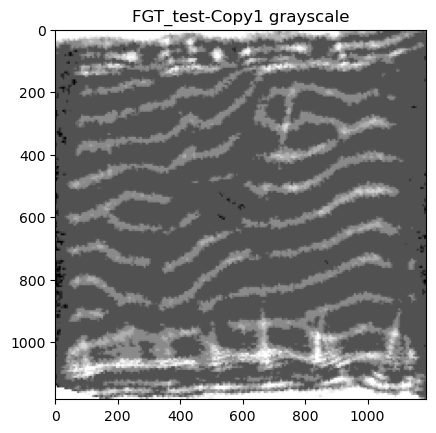

(1184, 1188)
light_pixels 461756
total_pixels 1406592
dark_pixels 944836
ratio 0.48871550194954466
FGT_test-Copy1.png ratio of light to dark pixels (light/dark):  0.48871550194954466


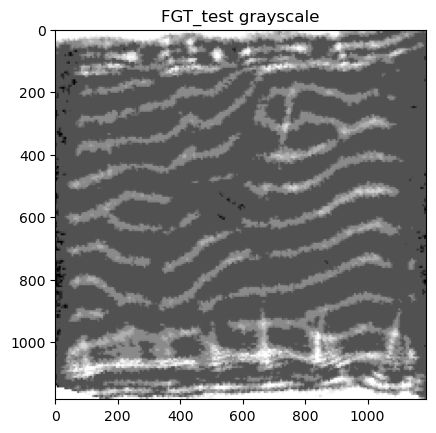

(1184, 1188)
light_pixels 461756
total_pixels 1406592
dark_pixels 944836
ratio 0.48871550194954466
FGT_test.png ratio of light to dark pixels (light/dark):  0.48871550194954466


In [38]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import csv

# Load the image
current_path = os.getcwd()
DATA_PATH = os.path.join(current_path, 'images') #path to where the data is saved


print(image.dtype)

#image preprocessing: thresholds based on binary intensity level, optional edge detection
def preprocess_images(image, image_filename): 
    #denoise image to speed up processing time: 
    image_denoised = cv2.fastNlMeansDenoising(image, None, 20, 7, 21)
    
    #plot: 
    # plt.imshow(image_denoised, cmap='gray')
    # plt.title('Denoised')
    # plt.show()

    # Threshold to detect light lines: higher threshold for bright features
    _, light_mask = cv2.threshold(image_denoised, 110, 255, cv2.THRESH_BINARY)
    
    #plot: 
    # plt.imshow(light_mask, cmap='gray')
    # plt.title('light mask')
    # plt.show()

    # #  apply edge detection to focus on line structures: don't think we need this, makes it harder to interpret results
    # edges = cv2.Canny(image, 50, 150)
    # light_edges = cv2.bitwise_and(edges, light_mask)
    # plt.imshow(edges, cmap='gray')
    # plt.title('edges')
    # plt.show()
    # plt.imshow(light_edges, cmap='gray')
    # plt.title('light thresholding and edges')
    # plt.show()

    #result is either light_mask or light_edges, depending on what you want to do: 
    result= light_mask
    
    # Save the result
    output_path = os.path.join(DATA_PATH, 'processed')
    output_filename = os.path.join(output_path, image_filename.replace('.png','_thresholded.png'))
    cv2.imwrite(output_filename, result)
    return result

#IMPLEMENT: light dark ratio of each file (light pixels/ dark pixels)
def image_lightdark_ratio(image, image_filename):
    light_pixels = cv2.countNonZero(image)
    print(image.shape)
    print('light_pixels', light_pixels)
    height, width = image.shape
    total_pixels = height*width
    print('total_pixels', total_pixels)
    dark_pixels = total_pixels-light_pixels
    print('dark_pixels', dark_pixels)
    ratio_light_to_dark = light_pixels/dark_pixels
    print('ratio', ratio_light_to_dark)
    
    return ratio_light_to_dark
    

#IMPLEMENT: loop through everything in folder and do all images at once
file_stats=[] #to be written to the csv file
for filename in os.listdir(DATA_PATH):
    if filename.endswith(".png"): #don't include txt files or folders
        #load the image:
        image_path = os.path.join(DATA_PATH, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # load image, convert to grayscale when loading
        #Display grayscale (unprocessed) image
        plt.imshow(image, cmap='gray')
        plt.title(filename.replace('.png', ' ')+'grayscale')
        plt.show() 
        #preprocess image:
        preprocessed_image = preprocess_images(image, filename)
        #get light to dark ratio: 
        image_ratio=image_lightdark_ratio(preprocessed_image, filename)
        file_stats.append([filename, round(image_ratio,3)])
        print(filename, 'ratio of light to dark pixels (light/dark): ', ratio)


#export as csv file with the light dark ratios: 
csv_filename= 'data_summary.csv'
csv_path=  output_path = os.path.join(DATA_PATH, 'processed',csv_filename)#csv filepath


with open(csv_path, 'w', newline='') as csvfile: 
    #write header
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['File name', 'Light to dark pixel ratio'])
    for name, ratio in file_stats: 
        csvwriter.writerow([name, ratio])
        
